In [8]:
import pandas as pd
import os

products = pd.read_csv("products_ver31.csv")
reviews = pd.read_csv("reviews_ver31.csv")

# Joining the products and reviews dataframes on the product_id/prod_id column
# joined_df = pd.merge(products, reviews, left_on="product_id", right_on="prod_id", how="inner")

data = pd.read_csv("joined_df.csv")
# Display the first few rows of the joined dataframe
data.head()
data.shape

(77748, 35)

In [30]:
data.columns

Index(['product_id', 'unique_product_id', 'top_cnt', 'search_name_x',
       'prod_name_x', 'description', 'price', 'url', 'create_date_x',
       'avg_rating', 'brand_name', 'review_cnt', 'ad_yn',
       'positive_reviews_cnt', 'negative_reviews_cnt', 'summary', 'keywords_x',
       'product_img_url', 'data_create_date', 'review_id', 'prod_id',
       'prod_name_y', 'rating', 'title', 'context', 'answer', 'review_url',
       'helped_cnt', 'create_date_y', 'top100_yn', 'sentiment', 'keywords_y',
       'search_caterory', 'survey', 'search_name_y', 'review_length'],
      dtype='object')

In [2]:
# joined_df.to_csv("joined_df.csv", index=False)

In [9]:
data.head()

,product_id,unique_product_id,top_cnt,search_name_x,prod_name_x,description,price,url,create_date_x,avg_rating,...,answer,review_url,helped_cnt,create_date_y,top100_yn,sentiment,keywords_y,search_caterory,survey,search_name_y
0,1,166996432,number no-1,쌀,"쌀 곰곰 소중한 우리 쌀 2022년산, 10kg(상등급), 1개",NaN,26590,https://www.coupang.com/vp/products/166996432?...,NaN,5,...,최근이에요,NaN,4,NaN,Y,NaN,NaN,NaN,NaN,쌀
1,1,166996432,number no-1,쌀,"쌀 곰곰 소중한 우리 쌀 2022년산, 10kg(상등급), 1개",NaN,26590,https://www.coupang.com/vp/products/166996432?...,NaN,5,...,최근이에요,NaN,3,NaN,N,NaN,NaN,NaN,NaN,쌀
2,1,166996432,number no-1,쌀,"쌀 곰곰 소중한 우리 쌀 2022년산, 10kg(상등급), 1개",NaN,26590,https://www.coupang.com/vp/products/166996432?...,NaN,5,...,최근이에요,NaN,2,NaN,Y,NaN,NaN,NaN,NaN,쌀
3,1,166996432,number no-1,쌀,"쌀 곰곰 소중한 우리 쌀 2022년산, 10kg(상등급), 1개",NaN,26590,https://www.coupang.com/vp/products/166996432?...,NaN,5,...,NaN,NaN,1,NaN,N,NaN,NaN,NaN,NaN,쌀
4,1,166996432,number no-1,쌀,"쌀 곰곰 소중한 우리 쌀 2022년산, 10kg(상등급), 1개",NaN,26590,https://www.coupang.com/vp/products/166996432?...,NaN,5,...,최근이에요,NaN,3,NaN,N,NaN,NaN,NaN,NaN,쌀


In [13]:
grouped_df = data.groupby('product_id')[['review_cnt', 'avg_rating', 'price']].mean()


In [14]:
grouped_df.head()

,review_cnt,avg_rating,price
product_id,,,
1,348441.0,5.0,26590.0
2,6096.0,5.0,30800.0
3,348441.0,5.0,12980.0
4,6096.0,5.0,19900.0
5,348441.0,5.0,49990.0


,review_length,rating
review_length,1.000000,0.157271
rating,0.157271,1.000000


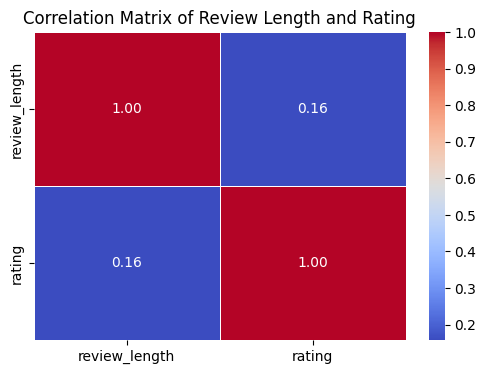

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for review length
data['review_length'] = data['context'].apply(len)

# Calculate correlation between 'review_length' and 'rating'
review_length_rating_correlation = data[['review_length', 'rating']].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(review_length_rating_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Review Length and Rating')

review_length_rating_correlation


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Select features and target
features = ['price', 'review_length', 'review_cnt']
target = 'avg_rating'

# Handle missing values by replacing them with the mean
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Get the coefficients of the model
coefficients = pd.Series(model.coef_, index=features)

rmse, coefficients


(0.17115331539615675,
 price           -6.561744e-07
 review_length    8.420516e-05
 review_cnt       9.714280e-08
 dtype: float64)

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate Kendall Tau correlation between 'price', 'review_length', 'review_cnt', and 'avg_rating'
# kendall_tau_correlation = data[['price', 'review_length', 'review_cnt', 'avg_rating']].corr(method='kendall')

# # Plot the correlation matrix
# plt.figure(figsize=(10, 6))
# sns.heatmap(kendall_tau_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Kendall Tau Correlation Matrix of Price, Review Length, Review Count, and Average Rating')

# kendall_tau_correlation

In [24]:
# Group the data by 'product_id'
grouped_data_corrected = data.groupby('product_id').agg({
    'rating': 'mean', # Average rating
    'review_cnt': 'first', # Count of reviews
    'price': 'first', # Price of the product
    'helped_cnt': 'sum' # Total number of times the review was helpful
})

# Reset the index
grouped_data_corrected = grouped_data_corrected.reset_index()

# Display the first few rows of the grouped data
grouped_data_corrected.head()


,product_id,rating,review_cnt,price,helped_cnt
0,1,5.000000,348441.0,26590.0,60
1,2,4.869565,6096.0,30800.0,126
2,3,5.000000,348441.0,12980.0,60
3,4,4.850000,6096.0,19900.0,122
4,5,5.000000,348441.0,49990.0,60


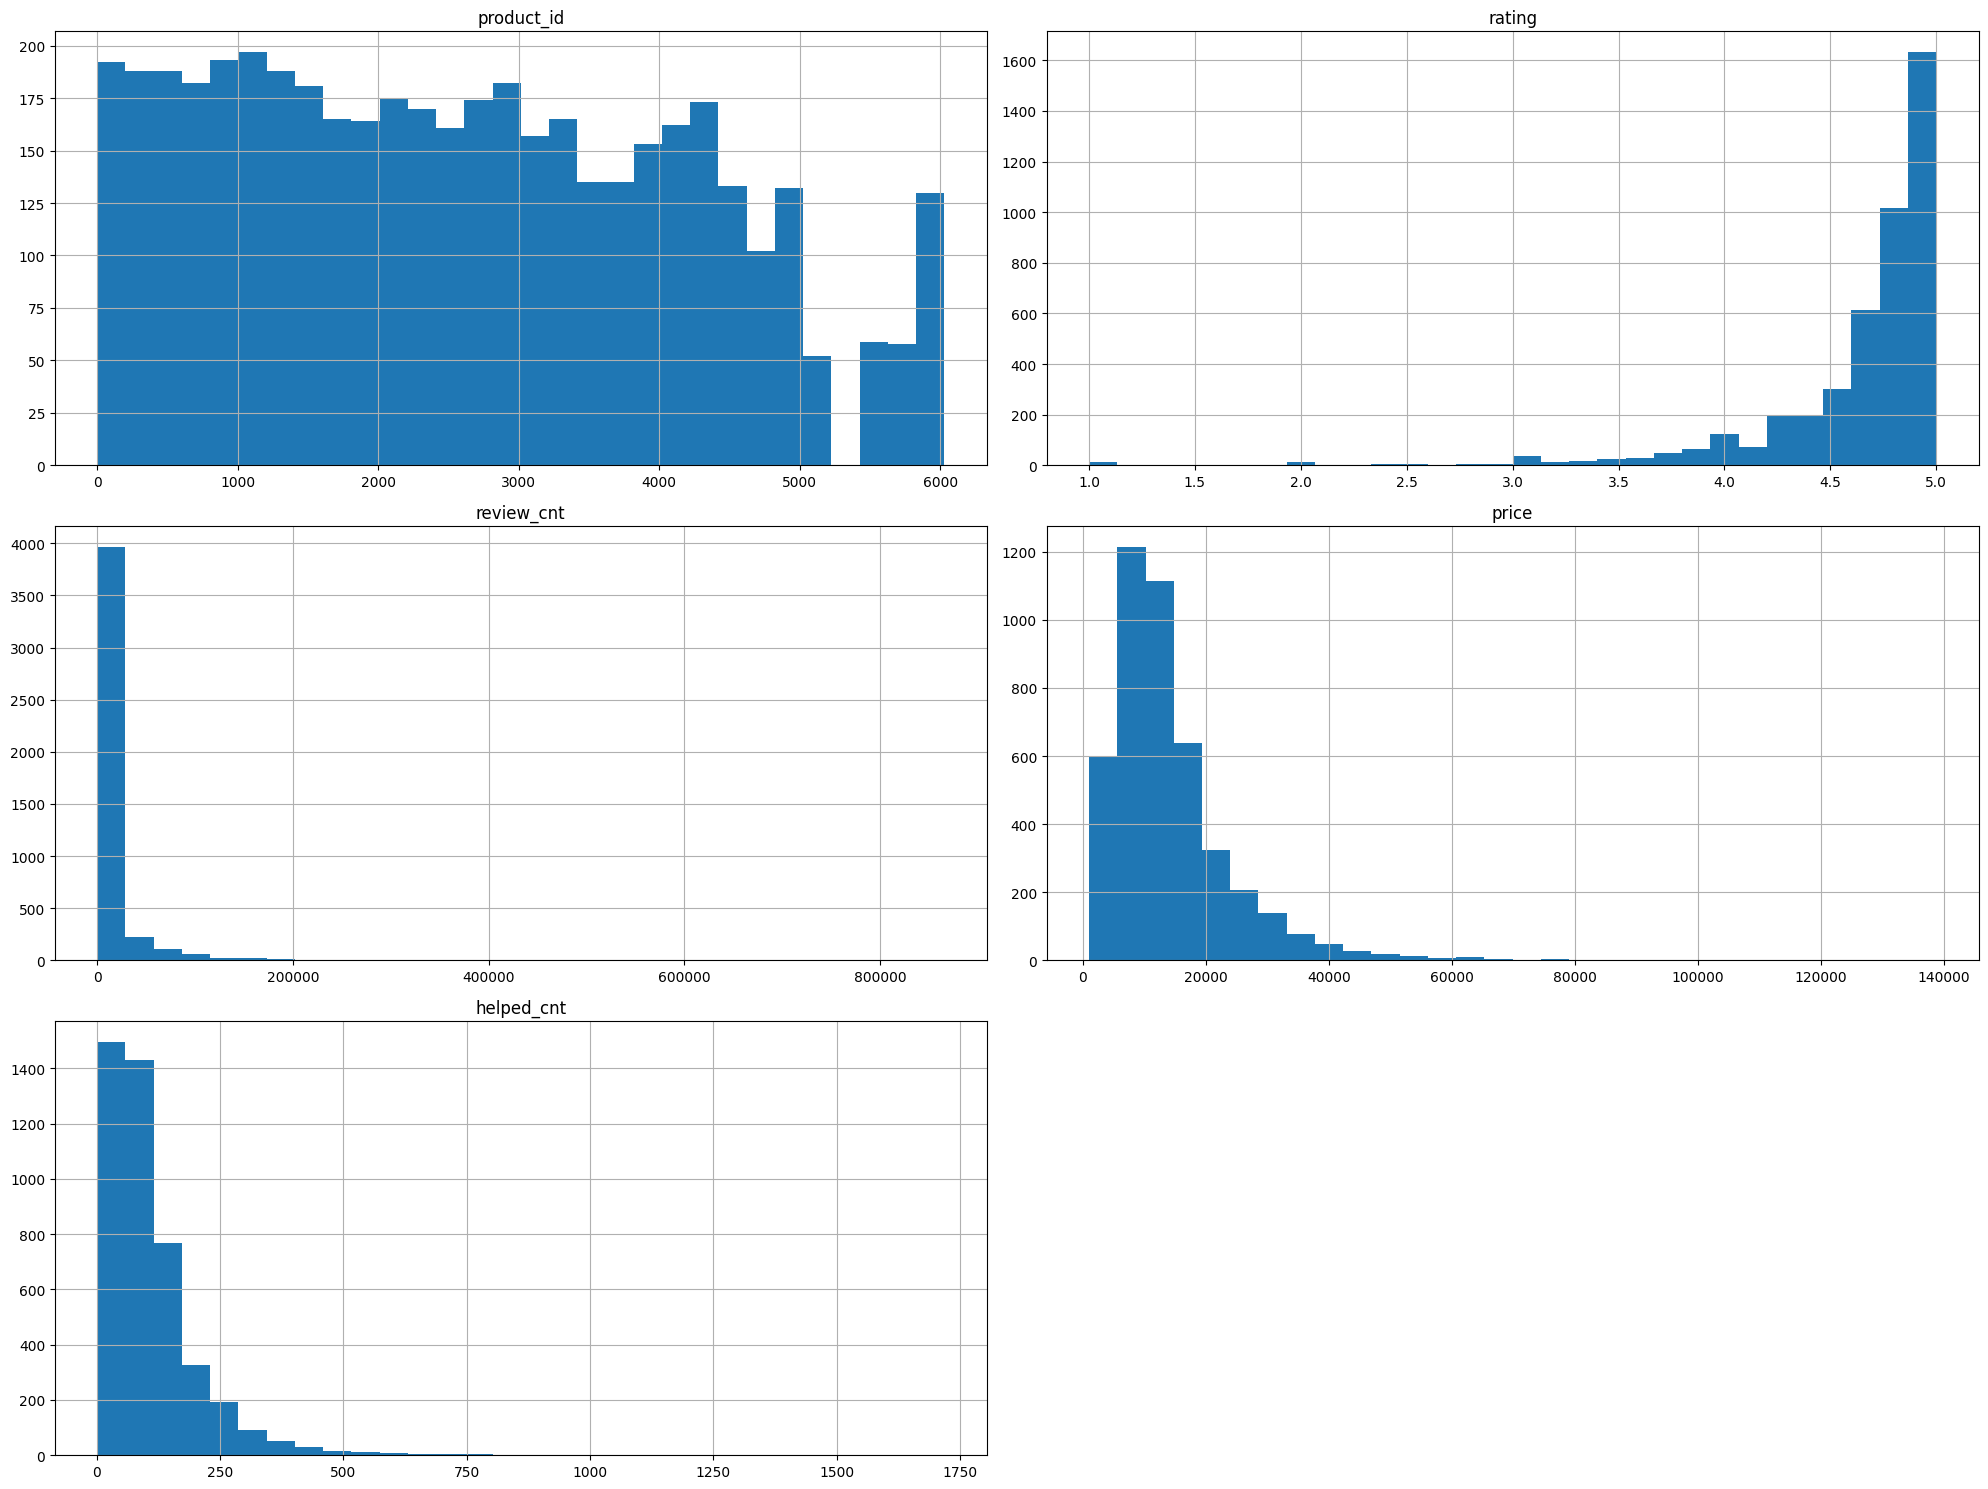

In [26]:
# Plot histograms of the features
grouped_data_corrected.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

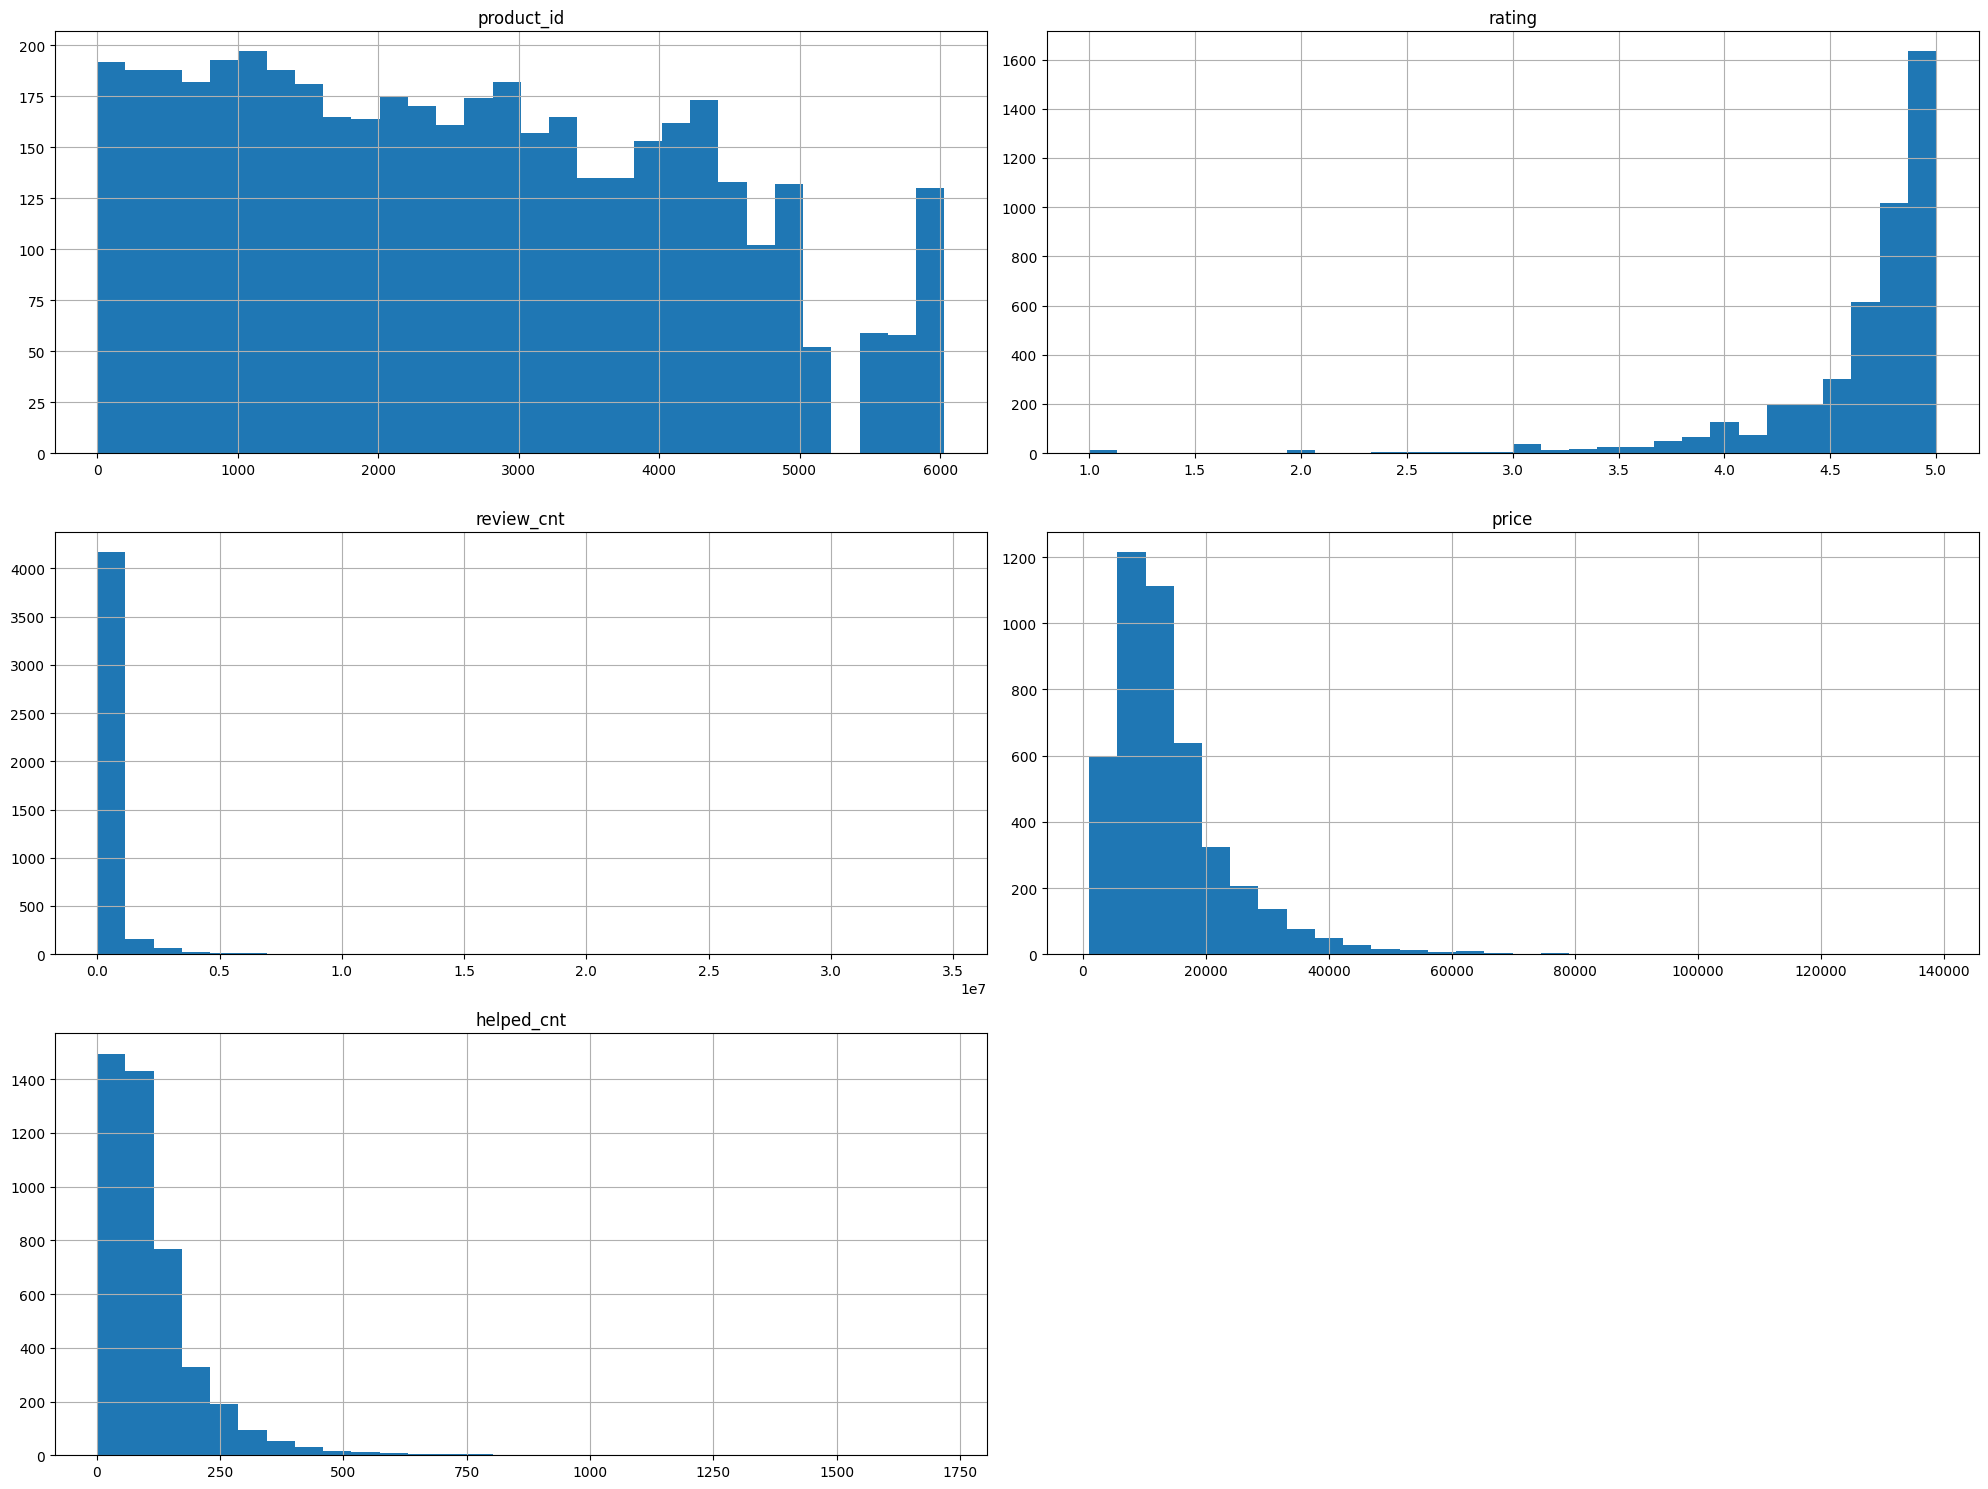

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of the features
grouped_data.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()


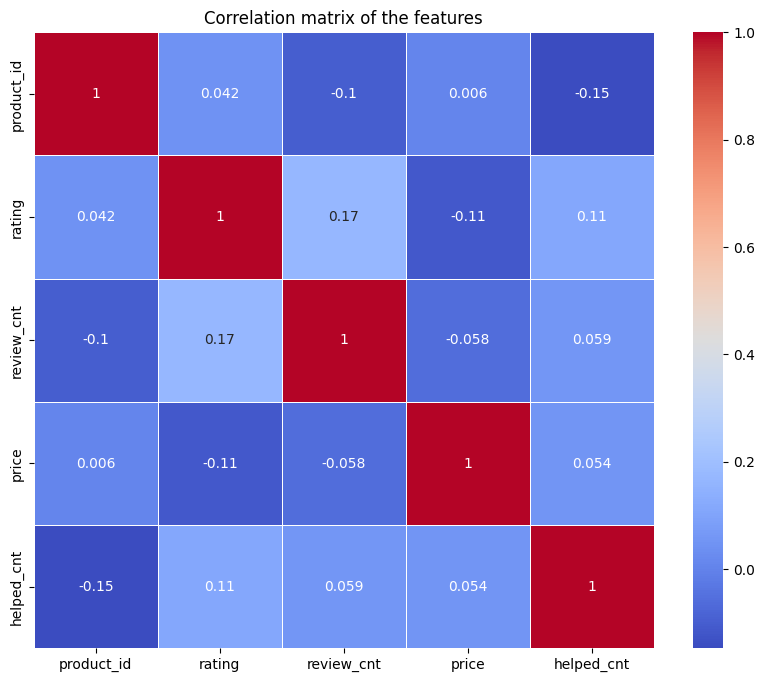

In [29]:
# Compute the correlation matrix
corr_matrix_corrected = grouped_data_corrected.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_corrected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation matrix of the features')
plt.show()
